## Starting to make a more generic G-Code library for 2429 tools 2022 2010 CJH
* made a library called simplegcode
* user just generates the points and tells the code which machine they want
  * shapeoko brute force writes all points and plunge drills each
  * benchmill uses a G82 (spot drill) or G83 (peck drill) cycle
* has functions 
  * generate_gcode() to get the gcode and
  * plot_points() to get a plot of the points


In [1]:
import simplegcode as sg
from importlib import reload

#### simple way to generate a grid - you can override and put in arbitrary points

In [2]:
# simple way to generate a grid
x_start, x_spacing = 0.5, 0.5
y_start, y_spacing = -0.5, -0.5
x_repeats = 8  # minimum 1
y_repeats = 3  # minimum 1

x = [x_start + x_spacing * _ for _ in range(x_repeats)]
y = [y_start + y_spacing * _ for _ in range(y_repeats)]
point_list = [(x_, y_) for x_ in x for y_ in y]
print(f'x range: ({min(x)},{max(x)})  y range: ({min(y)},{max(y)})\npointlist: {point_list}')

x range: (0.5,4.0)  y range: (-1.5,-0.5)
pointlist: [(0.5, -0.5), (0.5, -1.0), (0.5, -1.5), (1.0, -0.5), (1.0, -1.0), (1.0, -1.5), (1.5, -0.5), (1.5, -1.0), (1.5, -1.5), (2.0, -0.5), (2.0, -1.0), (2.0, -1.5), (2.5, -0.5), (2.5, -1.0), (2.5, -1.5), (3.0, -0.5), (3.0, -1.0), (3.0, -1.5), (3.5, -0.5), (3.5, -1.0), (3.5, -1.5), (4.0, -0.5), (4.0, -1.0), (4.0, -1.5)]


#### default options you can override by passing a dict to generate_gcode()

In [3]:
# options you can override
_ = [print(f'{d}: {sg.settings_dict[d]}') for d in sg.settings_dict]

shapeoko: {'DRILL_DEPTH': -0.12, 'RETRACT_HEIGHT': 0.5, 'ENGAGE_HEIGHT': 0.1, 'LINEAR_FEED': 100, 'DRILL_FEED': 5, 'RETRACT_FEED': 30}
benchmill: {'DRILL_DEPTH': -0.2, 'RETRACT_HEIGHT': 0.5, 'ENGAGE_HEIGHT': 0.1, 'LINEAR_FEED': 30, 'DRILL_FEED': 3, 'RETRACT_FEED': 20, 'TOOL': 4, 'PECK_TOOL': 5, 'PECK_STEP': 0.05}


#### example call 

In [4]:
machine = 'benchmill'  # shapeoko or benchmill
overrides = {'DRILL_DEPTH':-0.225} # dictionary of what to change from default
reload(sg)
code = sg.generate_gcode(point_list, machine=machine, peck=True, overrides=overrides, save_file=False)
print(code)

Using the following settings: {'DRILL_DEPTH': -0.225, 'RETRACT_HEIGHT': 0.5, 'ENGAGE_HEIGHT': 0.1, 'LINEAR_FEED': 30, 'DRILL_FEED': 3, 'RETRACT_FEED': 20, 'TOOL': 4, 'PECK_TOOL': 5, 'PECK_STEP': 0.05}

; ## DRILL CODE AUTOGENERATED FROM POINT LIST FOR BENCHMILL- CJH 2022 0211 11:13:56
N0002 G17 G20 G40 G80
N0004 G00 G53 G90 Z0
N0006 (3/8 X 90DEG CBT SPOT DRILL)
N0008 T05 M06
N0010 S3000 M03
G01 Z0.5 F20
N0030 G00 G90 X0.5 Y-0.5
; ## POINT #0:
N0032 X0.5 Y-0.5
; ## START CANNED PECK CYCLE
N0034 G83 G98 R0.1 Z-0.225 Q0.05 F3
X0.5 Y-1.0
X0.5 Y-1.5
X1.0 Y-1.5
X1.0 Y-1.0
X1.0 Y-0.5
X1.5 Y-0.5
X1.5 Y-1.0
X1.5 Y-1.5
X2.0 Y-1.5
X2.0 Y-1.0
X2.0 Y-0.5
X2.5 Y-0.5
X2.5 Y-1.0
X2.5 Y-1.5
X3.0 Y-1.5
X3.0 Y-1.0
X3.0 Y-0.5
X3.5 Y-0.5
X3.5 Y-1.0
X3.5 Y-1.5
X4.0 Y-1.5
X4.0 Y-1.0
X4.0 Y-0.5
; ## END CANNED CYCLE
N0036 G80 Z0.5
nN0046 G91 Z1 (CJH RAISE TOOL)
N0048 M30
; ## END OF AUTOGENERATED PROGRAM


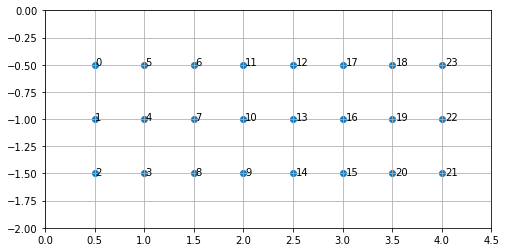

In [5]:
sg.plot_points(point_list, annotate=False, show_order=True)